In [1]:
import csv
import numpy as np
import pandas as pd
import math
import seaborn as sb
from matplotlib import pyplot as plt

In [12]:
# d = previous state distance to target
# b = previous state bearing to target
# d_meas = new measurement of distance to target
# b_meas = new measurement of bearing to target

def kalman_update(d, b, d_meas, d_bear, K):
    d_prime = K * d + (1-K) * d_meas
    b_prime = K * b + (1-K) * d_bear
    return (d_prime, b_prime)

In [13]:
# d = previous state distance to target
# b = previous state bearing to target
# m = amount moved forward

def kalman_predict(d, b, m):
    d_prime = law_of_cosines_b(d, m, b)
    b_prime = math.pi - law_of_sines_A(d, b, d_prime)
    return d_prime, b_prime

def dumb_kalman_predict(d, b, m):
    d_prime = d
    b_prime = b
    return d_prime, b_prime

In [14]:
# Edges are named after the opposite angle
def law_of_sines_A(a, B, b):
    return (math.asin((a * math.sin(B)) / b)) 

In [15]:
# Capital letter B is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_B(a, b, c):
    return math.acos((b**2 - a**2 - c**2)/(-2.0 * a * c))

In [16]:
# Capital letter B is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_b(a, c, B):
    return(math.sqrt(a**2 + c**2 - 2*a*c*math.cos(B)))

In [17]:
# Capital letter A is an angle. Small a, b and c are edges. 
# a is the edge across from A (I think that covers it.)
def law_of_cosines_A(a, b, c):
    return math.acos((-(a*a) + b*b + c*c) / (2 * b * c))

In [18]:
# elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest
df=pd.read_csv('motion4.csv', sep=',')

In [19]:
def test_harnass(K):
    state_dist = 0.8
    state_bear = math.radians(80)
    for index, row in df.iterrows():
        meas_dist = row['g_shortest']
        meas_bear = math.radians(row['g_shortest_bearing'])
        control_motion = row['g_forward_cmd'] * row['elapsed']
        temp_state_dist, temp_state_bear = kalman_predict(state_dist, state_bear, control_motion)
        pure_state_dist, pure_state_bear = kalman_predict(meas_dist, meas_bear, control_motion)
        state_dist, state_bear = kalman_update(temp_state_dist, temp_state_bear, meas_dist, meas_bear, K)
        df.loc[df.index[index], 'm'] = control_motion    
        df.loc[df.index[index], 'meas_dist'] = meas_dist
        df.loc[df.index[index], 'pure_state_dist'] = pure_state_dist    
        df.loc[df.index[index], 'temp_state_dist'] = temp_state_dist
        df.loc[df.index[index], 'state_dist'] = state_dist
        df.loc[df.index[index], 'meas_bear'] = math.degrees(meas_bear)
        df.loc[df.index[index], 'pure_state_bear'] = math.degrees(pure_state_bear)
        df.loc[df.index[index], 'state_bear'] = math.degrees(state_bear)
        df.loc[df.index[index], 'temp_state_bear'] = math.degrees(temp_state_bear)
        df.loc[df.index[index], 'K'] = K
    return df

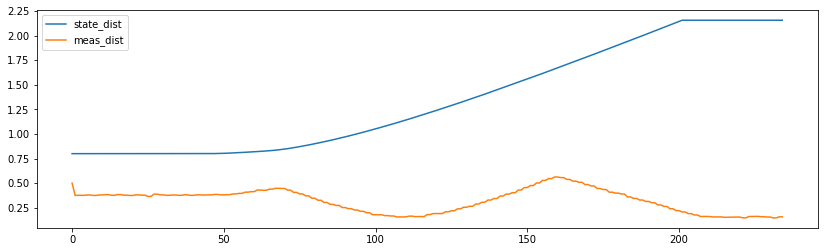

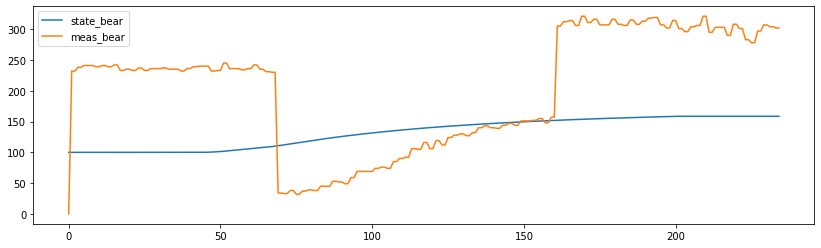

In [11]:
df = test_harnass(1.0)
df.plot(y=['state_dist', 'meas_dist'], figsize=[14,4])
df.plot(y=['state_bear', 'meas_bear'], figsize=[14,4])

In [122]:
df

,elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest,m,meas_dist,pure_state_dist,temp_state_dist,state_dist,meas_bear,pure_state_bear,state_bear,temp_state_bear,K
0,0.000,0.0,0.0,0.0,0.500000,0.0,0.500000,0.500000,0.800000,0.650000,0.0,180.0,50.000000,100.000000,0.5
1,0.105,0.0,0.0,232.0,0.376517,0.0,0.376517,0.376517,0.650000,0.513259,232.0,232.0,181.000000,130.000000,0.5
2,0.094,0.0,0.0,232.0,0.376517,0.0,0.376517,0.376517,0.513259,0.444888,232.0,232.0,206.500000,181.000000,0.5
3,0.099,0.0,0.0,238.0,0.376941,0.0,0.376941,0.376941,0.444888,0.410914,238.0,238.0,222.250000,206.500000,0.5
4,0.100,0.0,0.0,238.0,0.376941,0.0,0.376941,0.376941,0.410914,0.393928,238.0,238.0,230.125000,222.250000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,0.100,0.0,0.0,307.0,0.156191,0.0,0.156191,0.156191,0.158025,0.157108,307.0,233.0,281.154721,255.309442,0.5
231,0.104,0.0,0.0,304.0,0.147077,0.0,0.147077,0.147077,0.157108,0.152093,304.0,236.0,281.422640,258.845279,0.5
232,0.096,0.0,0.0,304.0,0.147077,0.0,0.147077,0.147077,0.152093,0.149585,304.0,236.0,281.288680,258.577360,0.5
233,0.101,0.0,0.0,302.0,0.158168,0.0,0.158168,0.158168,0.149585,0.153876,302.0,238.0,280.355660,258.711320,0.5


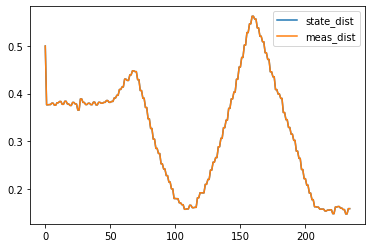

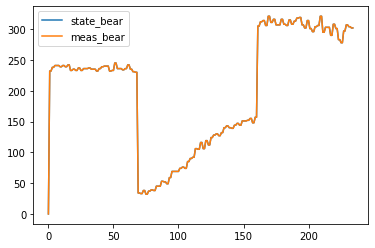

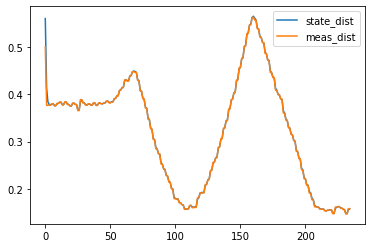

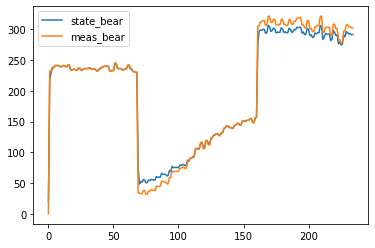

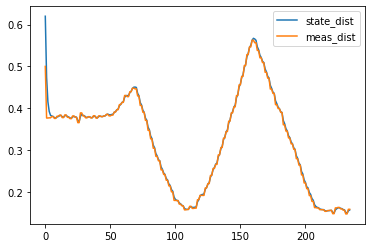

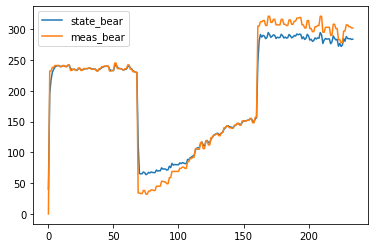

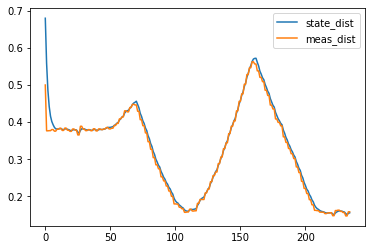

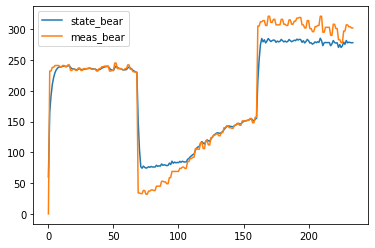

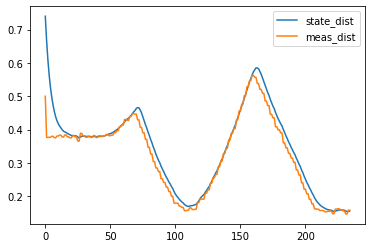

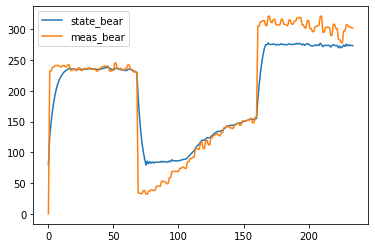

In [107]:
# elapsed,g_forward_cmd,g_turn_cmd,g_shortest_bearing,g_shortest
for K in range(0, 5):
    # dfall = dfall.append(test_harnass(K * 0.2))
    df1 = test_harnass(K * 0.2)
    df1.plot(y=['state_dist', 'meas_dist'])
    df1.plot(y=['state_bear', 'meas_bear'])

In [20]:
# Test various trig functions
df = pd.DataFrame(columns = ["b_index", "B", "l", "d", "d_prime", "b_prime", "law_of_sines"])
start = -360
end = 360
for b_index in range (start, end, 36):
    B = math.radians(b_index)
    l = 0
    d = 1
    d_prime, b_prime = trig_kalman_predict(d, B, l)
    law_of_sines = law_of_sines_A(1, B, 1)
    df = df.append([{"B": math.degrees(B), "law_of_sines": law_of_sines, "l":l,"d": d, "d_prime": d_prime, "b_prime": math.degrees(b_prime), "b_index": b_index}])
df = df.set_index("b_index")    

NameError: name 'trig_kalman_predict' is not defined

In [142]:
df

,B,l,d,d_prime,b_prime,law_of_sines
b_index,,,,,,
-360,-360.0,0,1,1.0,180.0,2.449294e-16
-324,-324.0,0,1,1.0,144.0,6.283185e-01
-288,-288.0,0,1,1.0,108.0,1.256637e+00
-252,-252.0,0,1,1.0,108.0,1.256637e+00
-216,-216.0,0,1,1.0,144.0,6.283185e-01
-180,-180.0,0,1,1.0,180.0,-1.224647e-16
-144,-144.0,0,1,1.0,216.0,-6.283185e-01
-108,-108.0,0,1,1.0,252.0,-1.256637e+00
-72,-72.0,0,1,1.0,252.0,-1.256637e+00


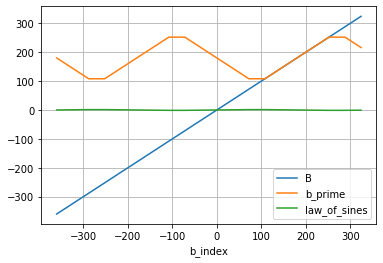

In [143]:
df.plot(y=['B','b_prime', "law_of_sines"], grid=True)

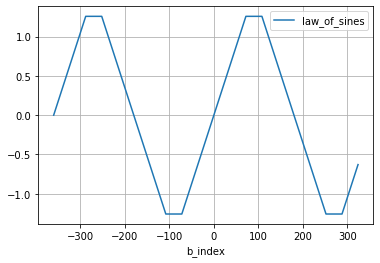

In [144]:
df.plot(y=["law_of_sines"], grid=True)